### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset

data = pd.read_csv('lung_cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data.shape

(309, 16)

### Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
# identifying the duplicate datas

data[data.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
223,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
256,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
284,M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES


In [9]:
# drop duplicate data

data.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [10]:
data.shape

(309, 16)

In [11]:
data['GENDER'].value_counts()

M    162
F    147
Name: GENDER, dtype: int64

In [12]:
data['GENDER']= data['GENDER'].map({'M':1, 'F':0})

In [13]:
data['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [14]:
data['LUNG_CANCER']= data['LUNG_CANCER'].map({'YES':1, 'NO':0})

In [15]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [16]:
data.info() # therefore converted all the data to "int" type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [17]:
# creating copy of original data

copy_1 = data.copy()
copy_2 = data.copy()

### Data Visualization

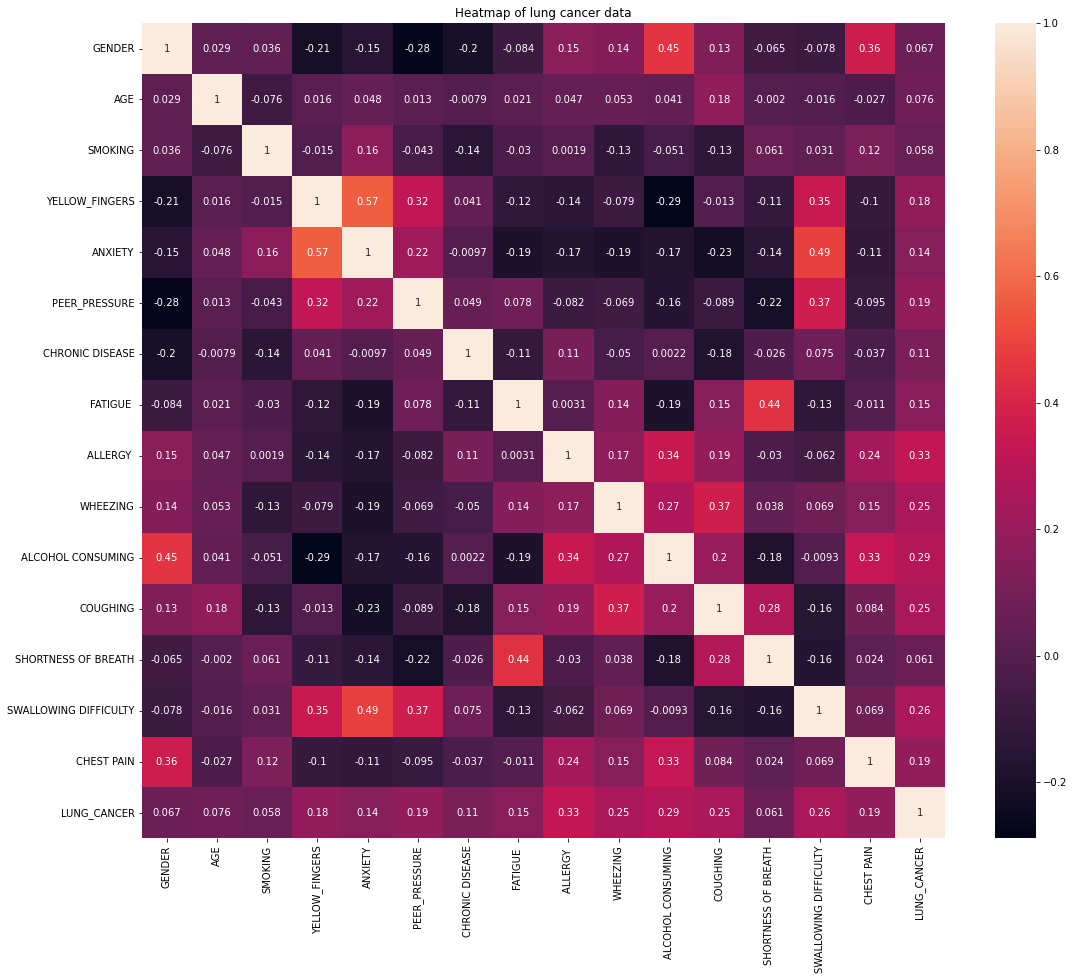

In [18]:
plt.figure(figsize = (18,15))
plt.title('Heatmap of lung cancer data')
sns.heatmap(copy_1.corr(method = 'spearman'), annot = True)
plt.show()

<Figure size 3600x3240 with 0 Axes>

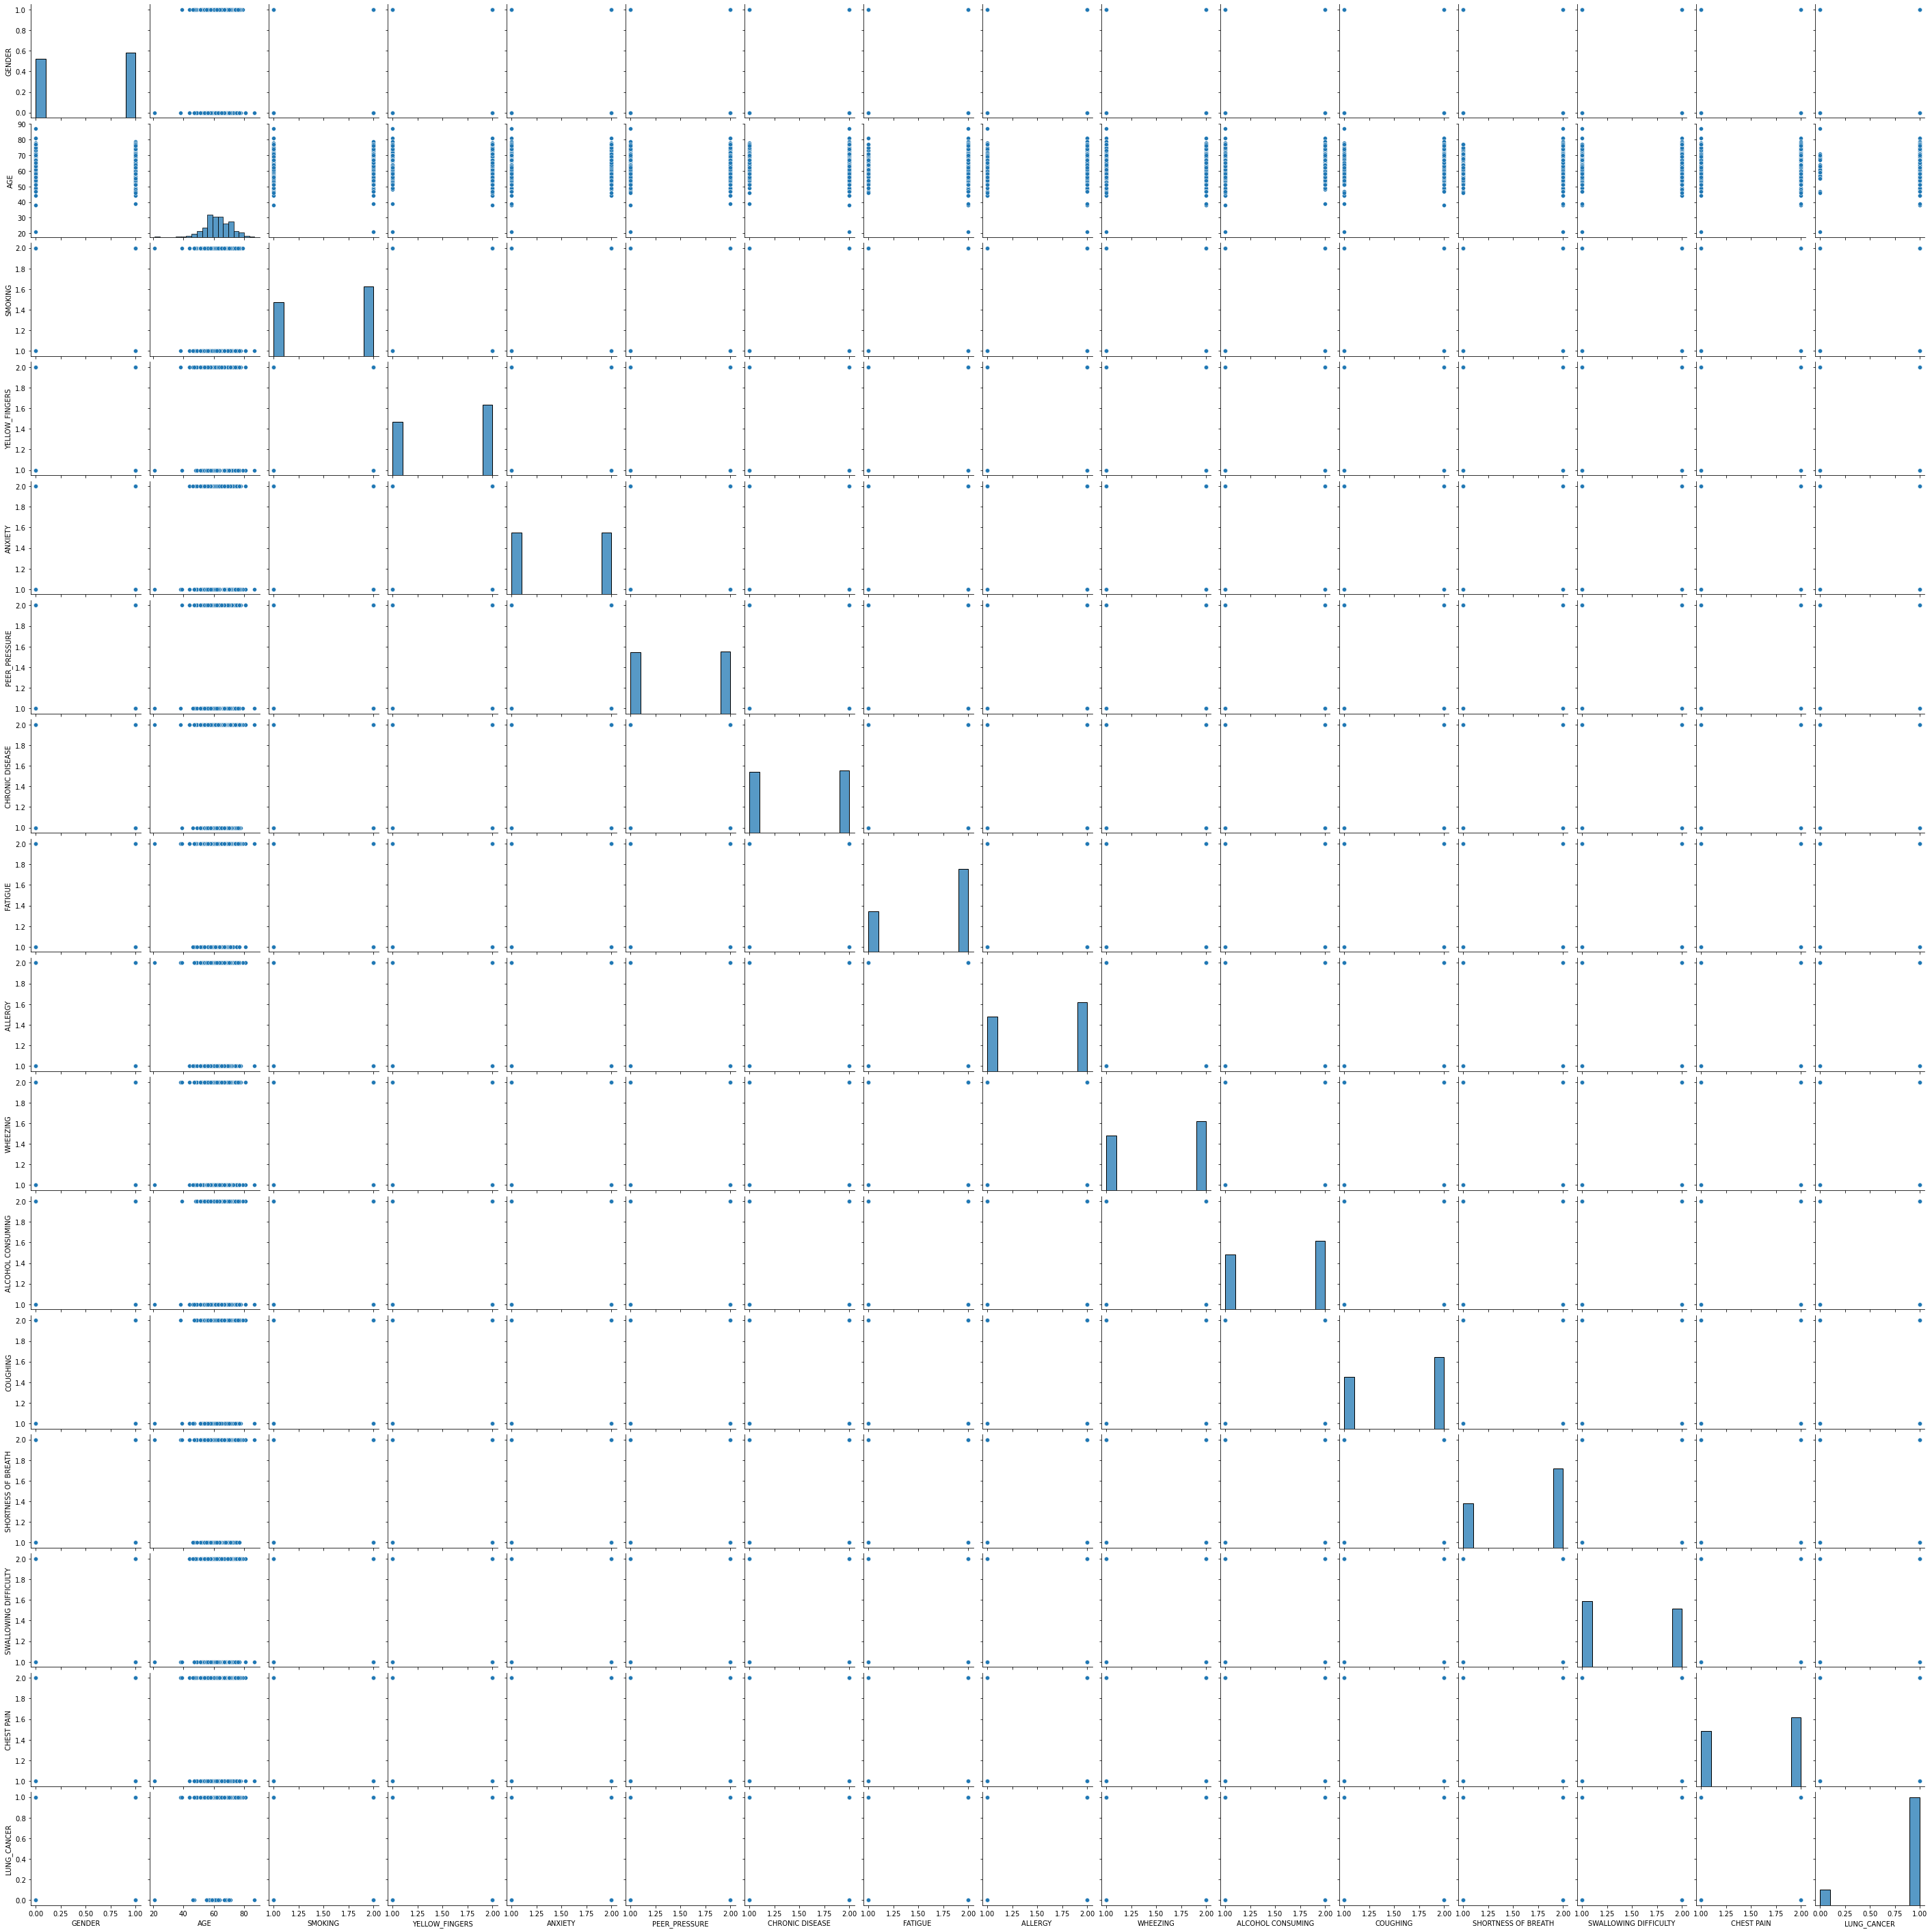

In [19]:
plt.figure(figsize = (50,45))
sns.pairplot(copy_1)
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

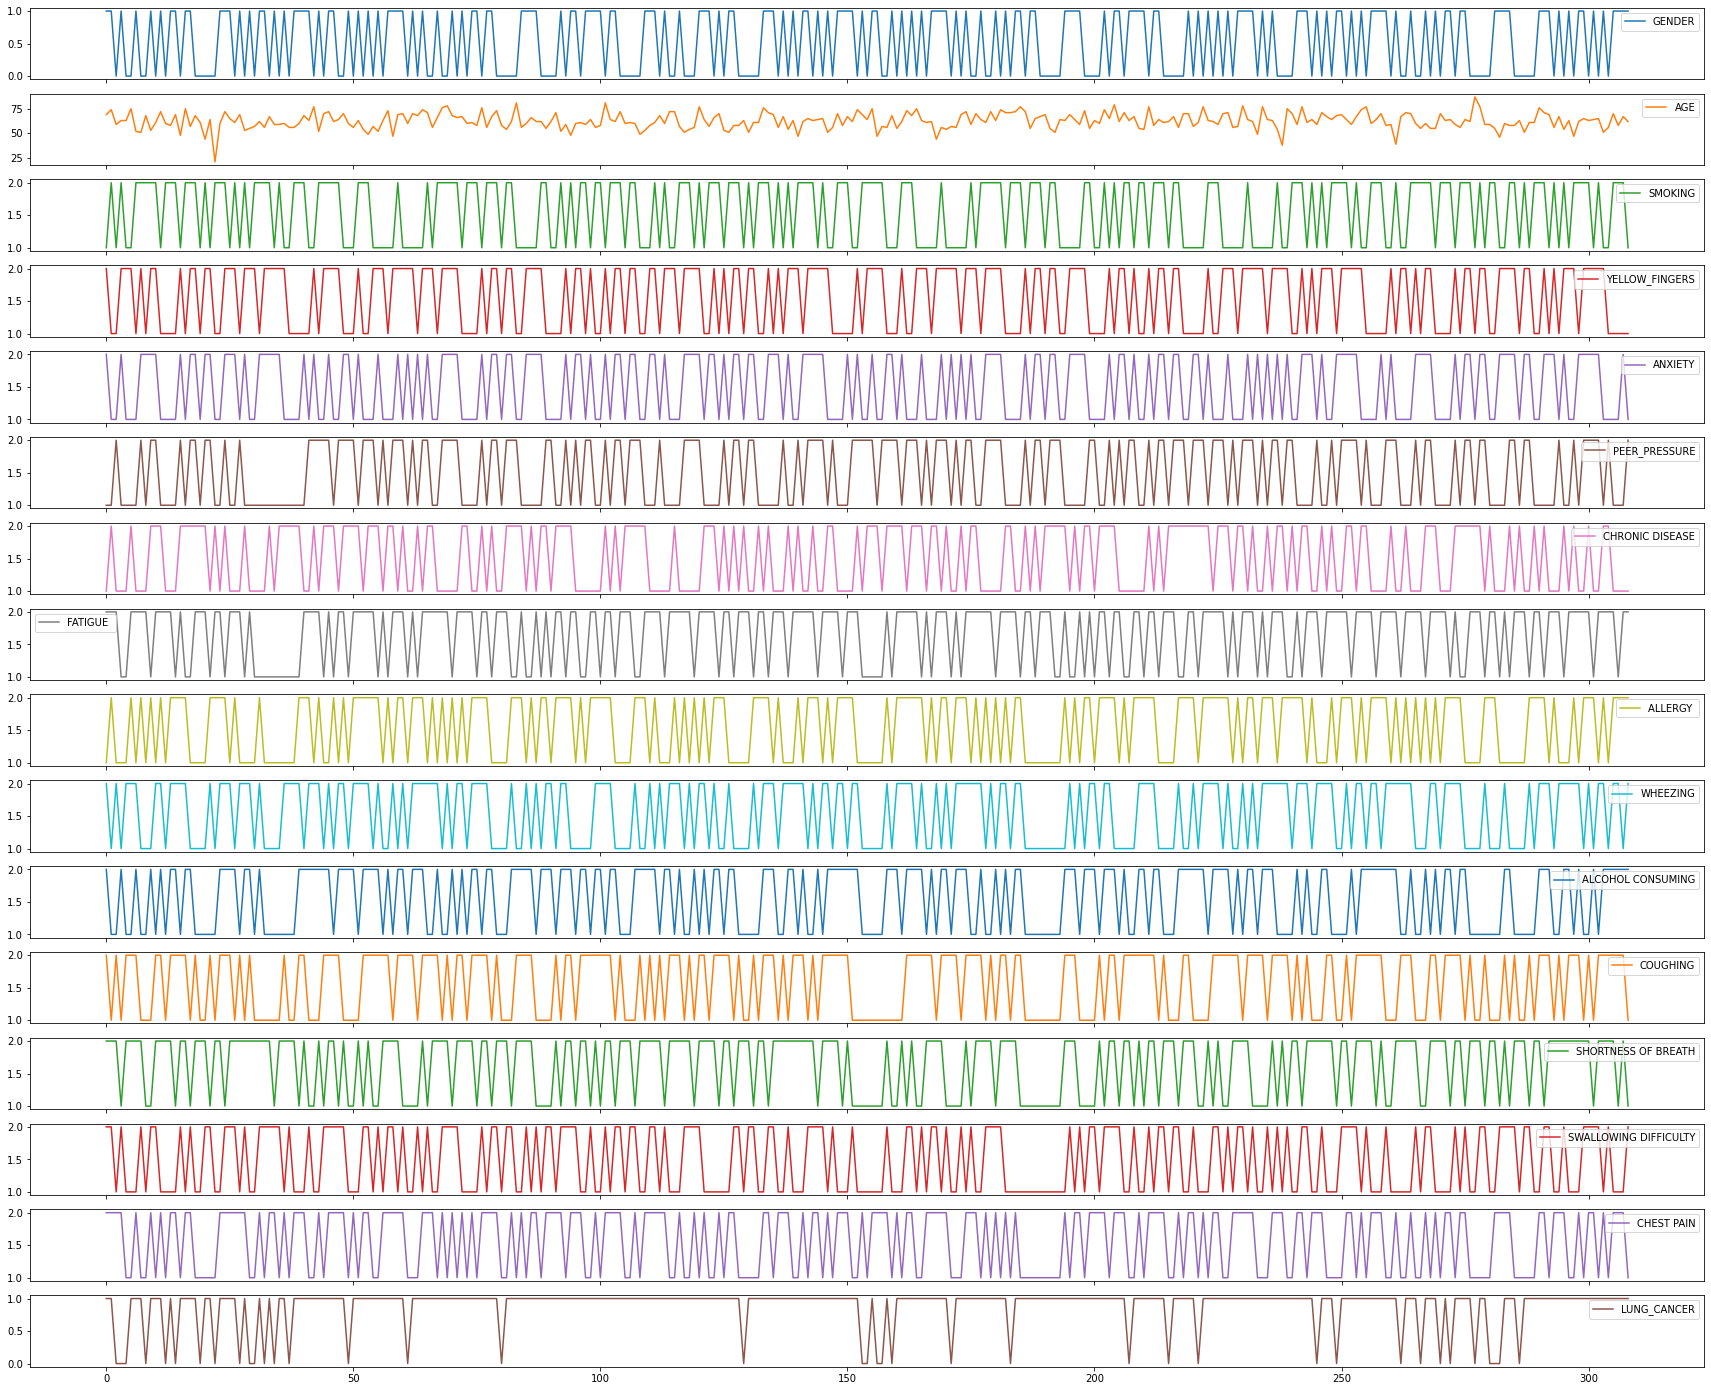

In [20]:
copy_1.plot(subplots = True, figsize = (30,25))

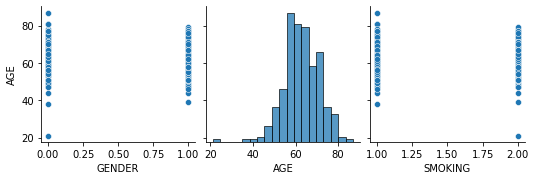

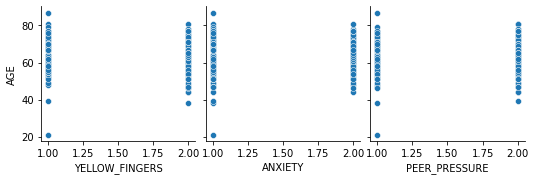

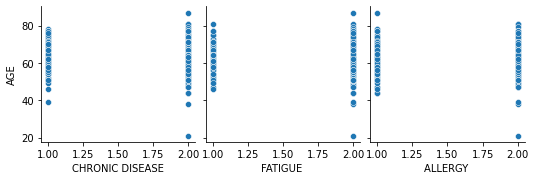

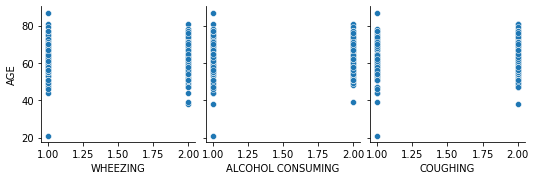

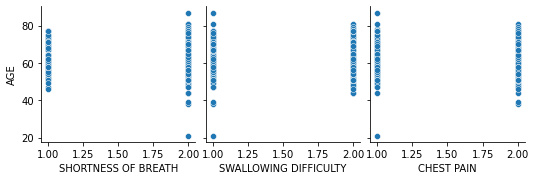

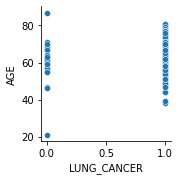

In [21]:
# pairplot based on age

df_select = copy_1.select_dtypes(include = ['int64'])

for i in range(0, len(df_select.columns), 3):
    sns.pairplot(data = copy_1, x_vars = df_select.columns[i: i+3], y_vars = ['AGE'])

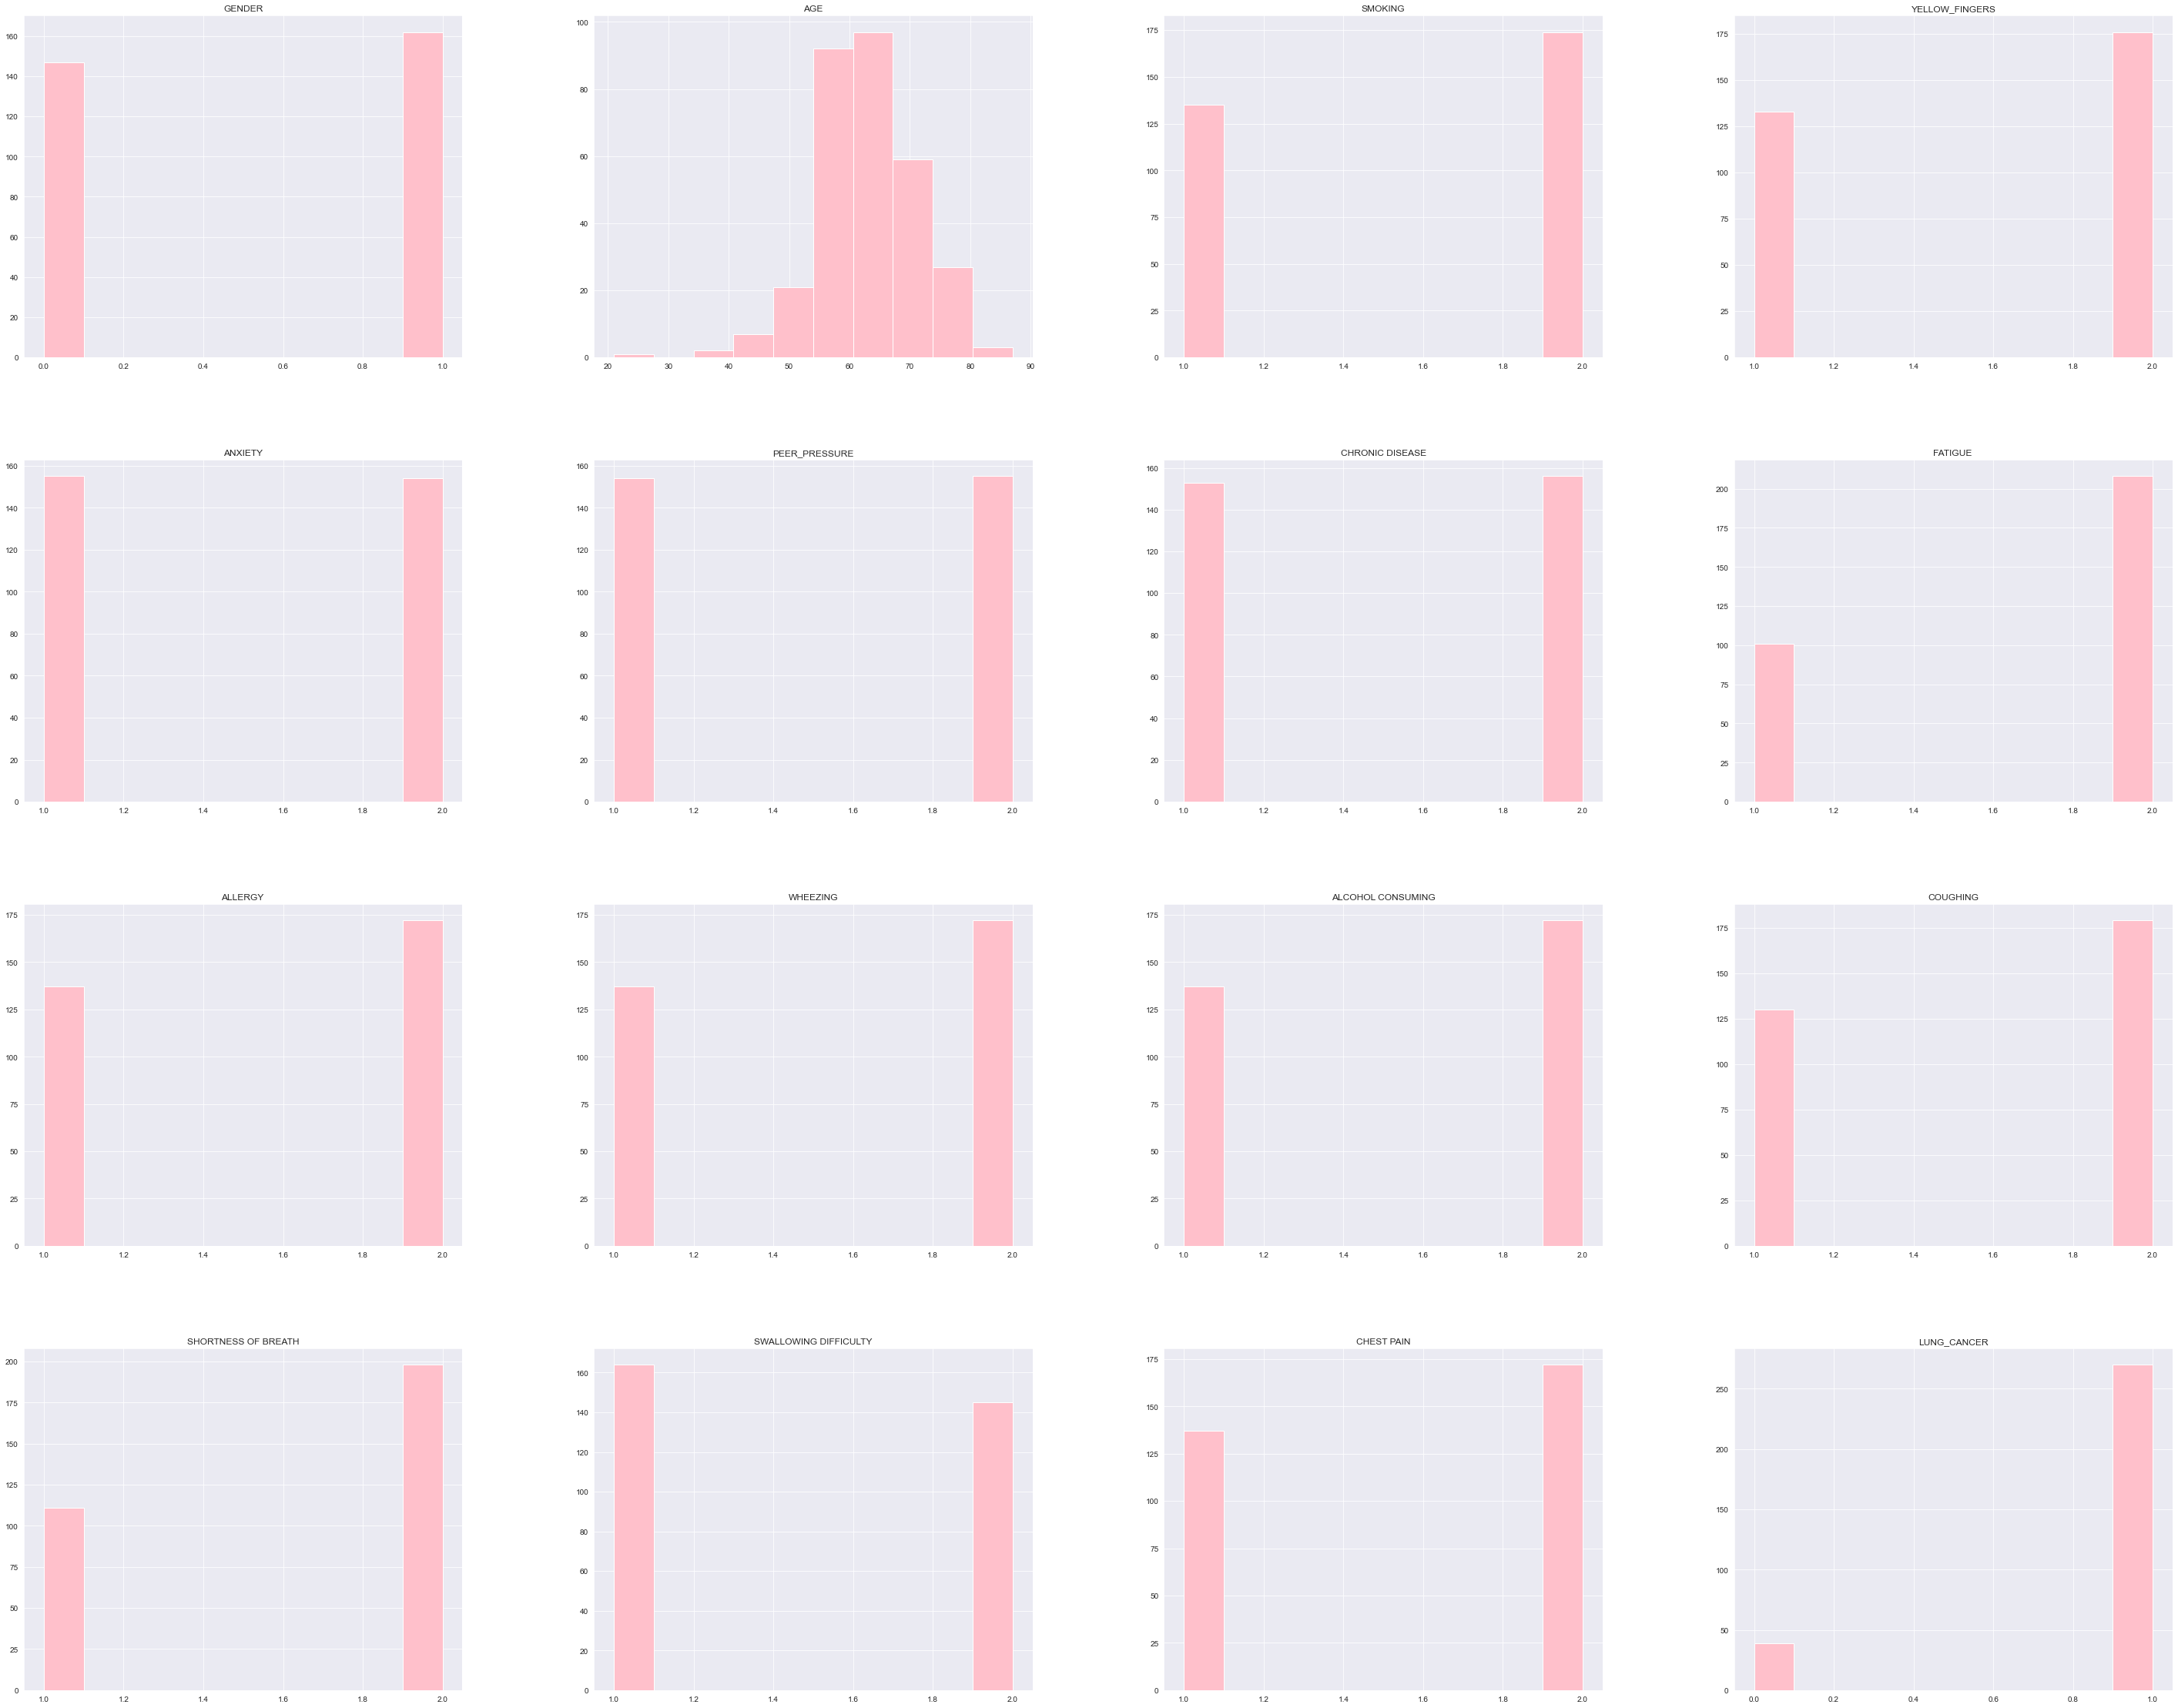

In [24]:
# plt.figure()
sns.set_style('darkgrid')
copy_1.hist(figsize = (50,40), color = 'pink');
# sns.despine()
plt.show()

### Apply Machine Learning Models to predict the cancer patients

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(copy_1)
scaled_data = pd.DataFrame(scaled_data, columns = copy_1.columns)

scaled_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.952579,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475,0.380058
1,0.952579,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475,0.380058
2,-1.049781,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475,-2.631174
3,0.952579,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475,-2.631174
4,-1.049781,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480,-2.631174


#  Algorithms
### 1. Principal Component Analysis

In [26]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver = 'randomized', random_state = 100)
pca.fit(scaled_data)

PCA(random_state=100, svd_solver='randomized')

In [27]:
column_names = list(scaled_data.columns)
pca_df = pd.DataFrame({'PCA_1' : pca.components_[0], 
                       'PCA_2' : pca.components_[1],
                      'Features' : column_names})
pca_df.head()

,PCA_1,PCA_2,Features
0,0.324906,-0.158269,GENDER
1,0.042161,-0.099536,AGE
2,-0.043209,-0.020447,SMOKING
3,-0.361357,-0.256869,YELLOW_FINGERS
4,-0.386656,-0.280358,ANXIETY


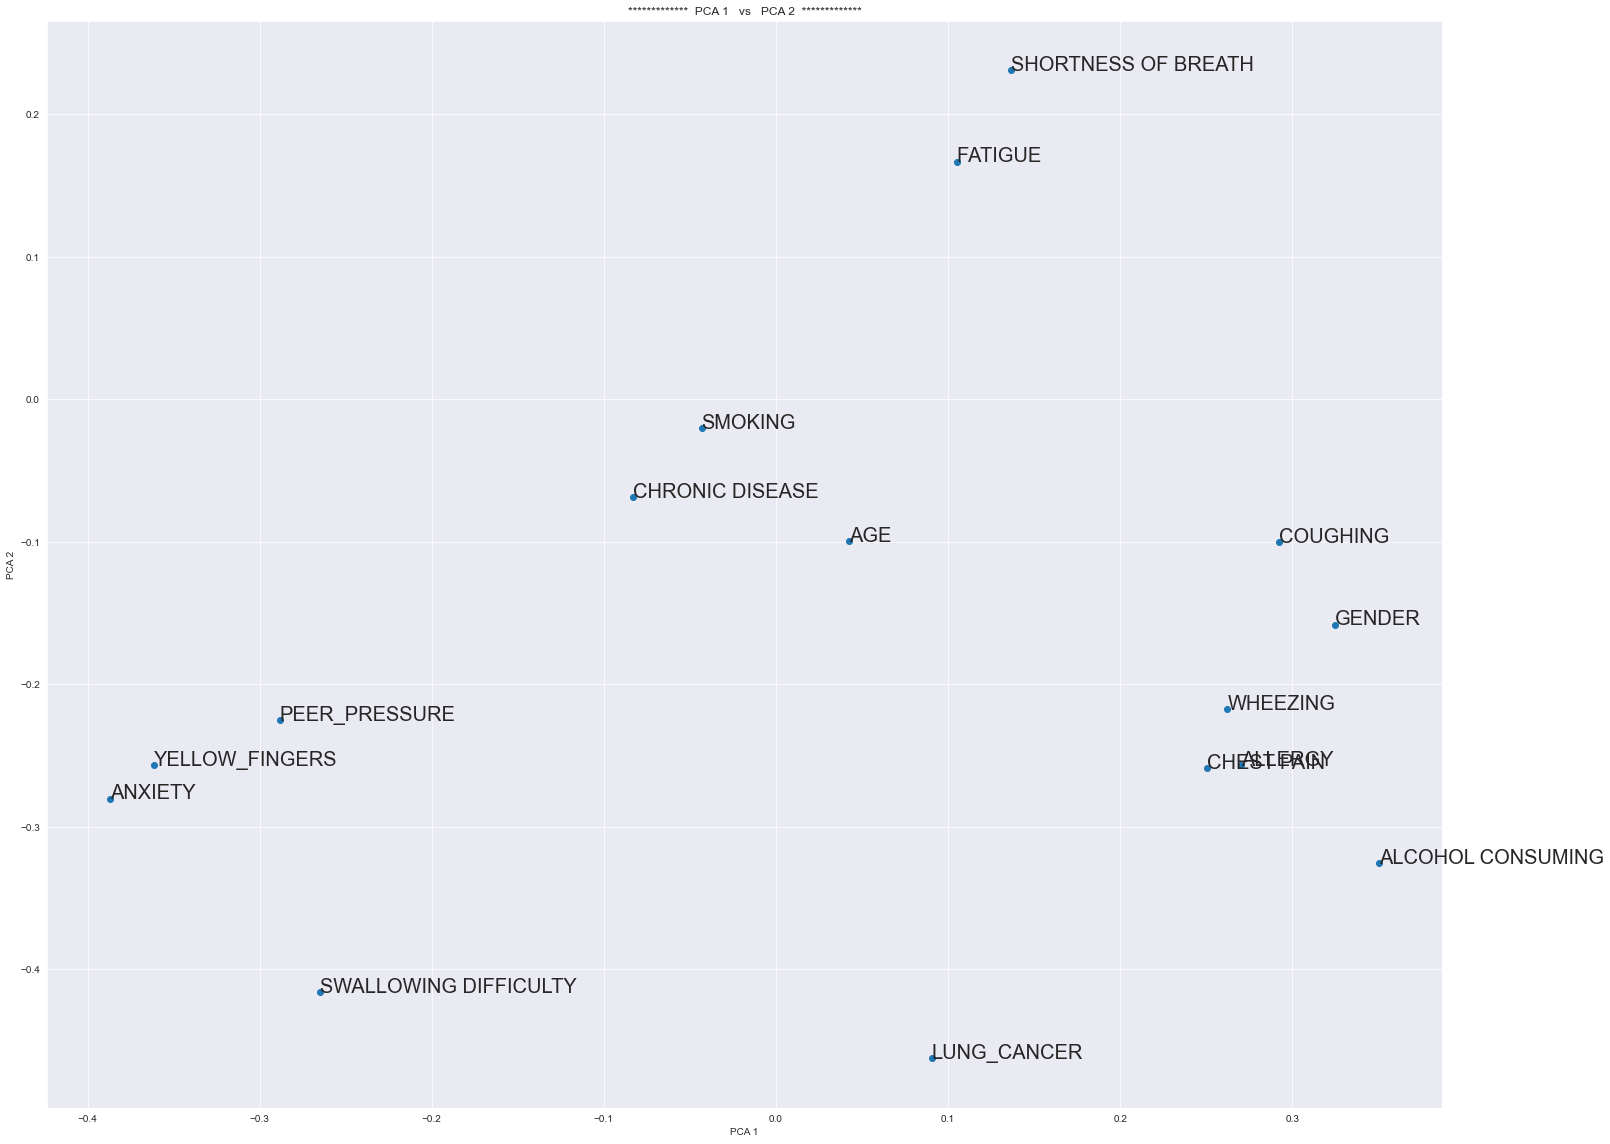

In [28]:
# PCA 1 V/S PCA 2 using scatter plot, checking variance ratio & outlier analysis

plt.figure(figsize = (25,20))
plt.title('*************  PCA 1   vs   PCA 2  *************')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.scatter(pca_df.PCA_1, pca_df.PCA_2)

for i, txt in enumerate(pca_df.Features):
    plt.annotate(txt, (pca_df.PCA_1[i], pca_df.PCA_2[i]), fontsize = 20)
plt.show()

In [29]:
print('PCA variance ratio : ', pca.explained_variance_ratio_,'\n\n')

round(scaled_data.describe(percentiles = [0.05, 0.25, 0.50, 0.75, 0.95]), 2)

PCA variance ratio :  [0.17951432 0.13453501 0.11049705 0.08404392 0.07442484 0.06142451
 0.05584007 0.05166199 0.04583044 0.04091897 0.03740785 0.03408113
 0.02850078 0.02314736 0.0206149  0.01755685] 




,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.00,309.00,309.00,309.00,309.0,309.0,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00
mean,-0.00,0.00,0.00,0.00,-0.0,0.0,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.05,-5.08,-1.14,-1.15,-1.0,-1.0,-1.01,-1.44,-1.12,-1.12,-1.12,-1.17,-1.34,-0.94,-1.12,-2.63
5%,-1.05,-1.42,-1.14,-1.15,-1.0,-1.0,-1.01,-1.44,-1.12,-1.12,-1.12,-1.17,-1.34,-0.94,-1.12,-2.63
25%,-1.05,-0.69,-1.14,-1.15,-1.0,-1.0,-1.01,-1.44,-1.12,-1.12,-1.12,-1.17,-1.34,-0.94,-1.12,0.38
50%,0.95,-0.08,0.88,0.87,-1.0,1.0,0.99,0.70,0.89,0.89,0.89,0.85,0.75,-0.94,0.89,0.38
75%,0.95,0.77,0.88,0.87,1.0,1.0,0.99,0.70,0.89,0.89,0.89,0.85,0.75,1.06,0.89,0.38
95%,0.95,1.63,0.88,0.87,1.0,1.0,0.99,0.70,0.89,0.89,0.89,0.85,0.75,1.06,0.89,0.38
max,0.95,2.97,0.88,0.87,1.0,1.0,0.99,0.70,0.89,0.89,0.89,0.85,0.75,1.06,0.89,0.38


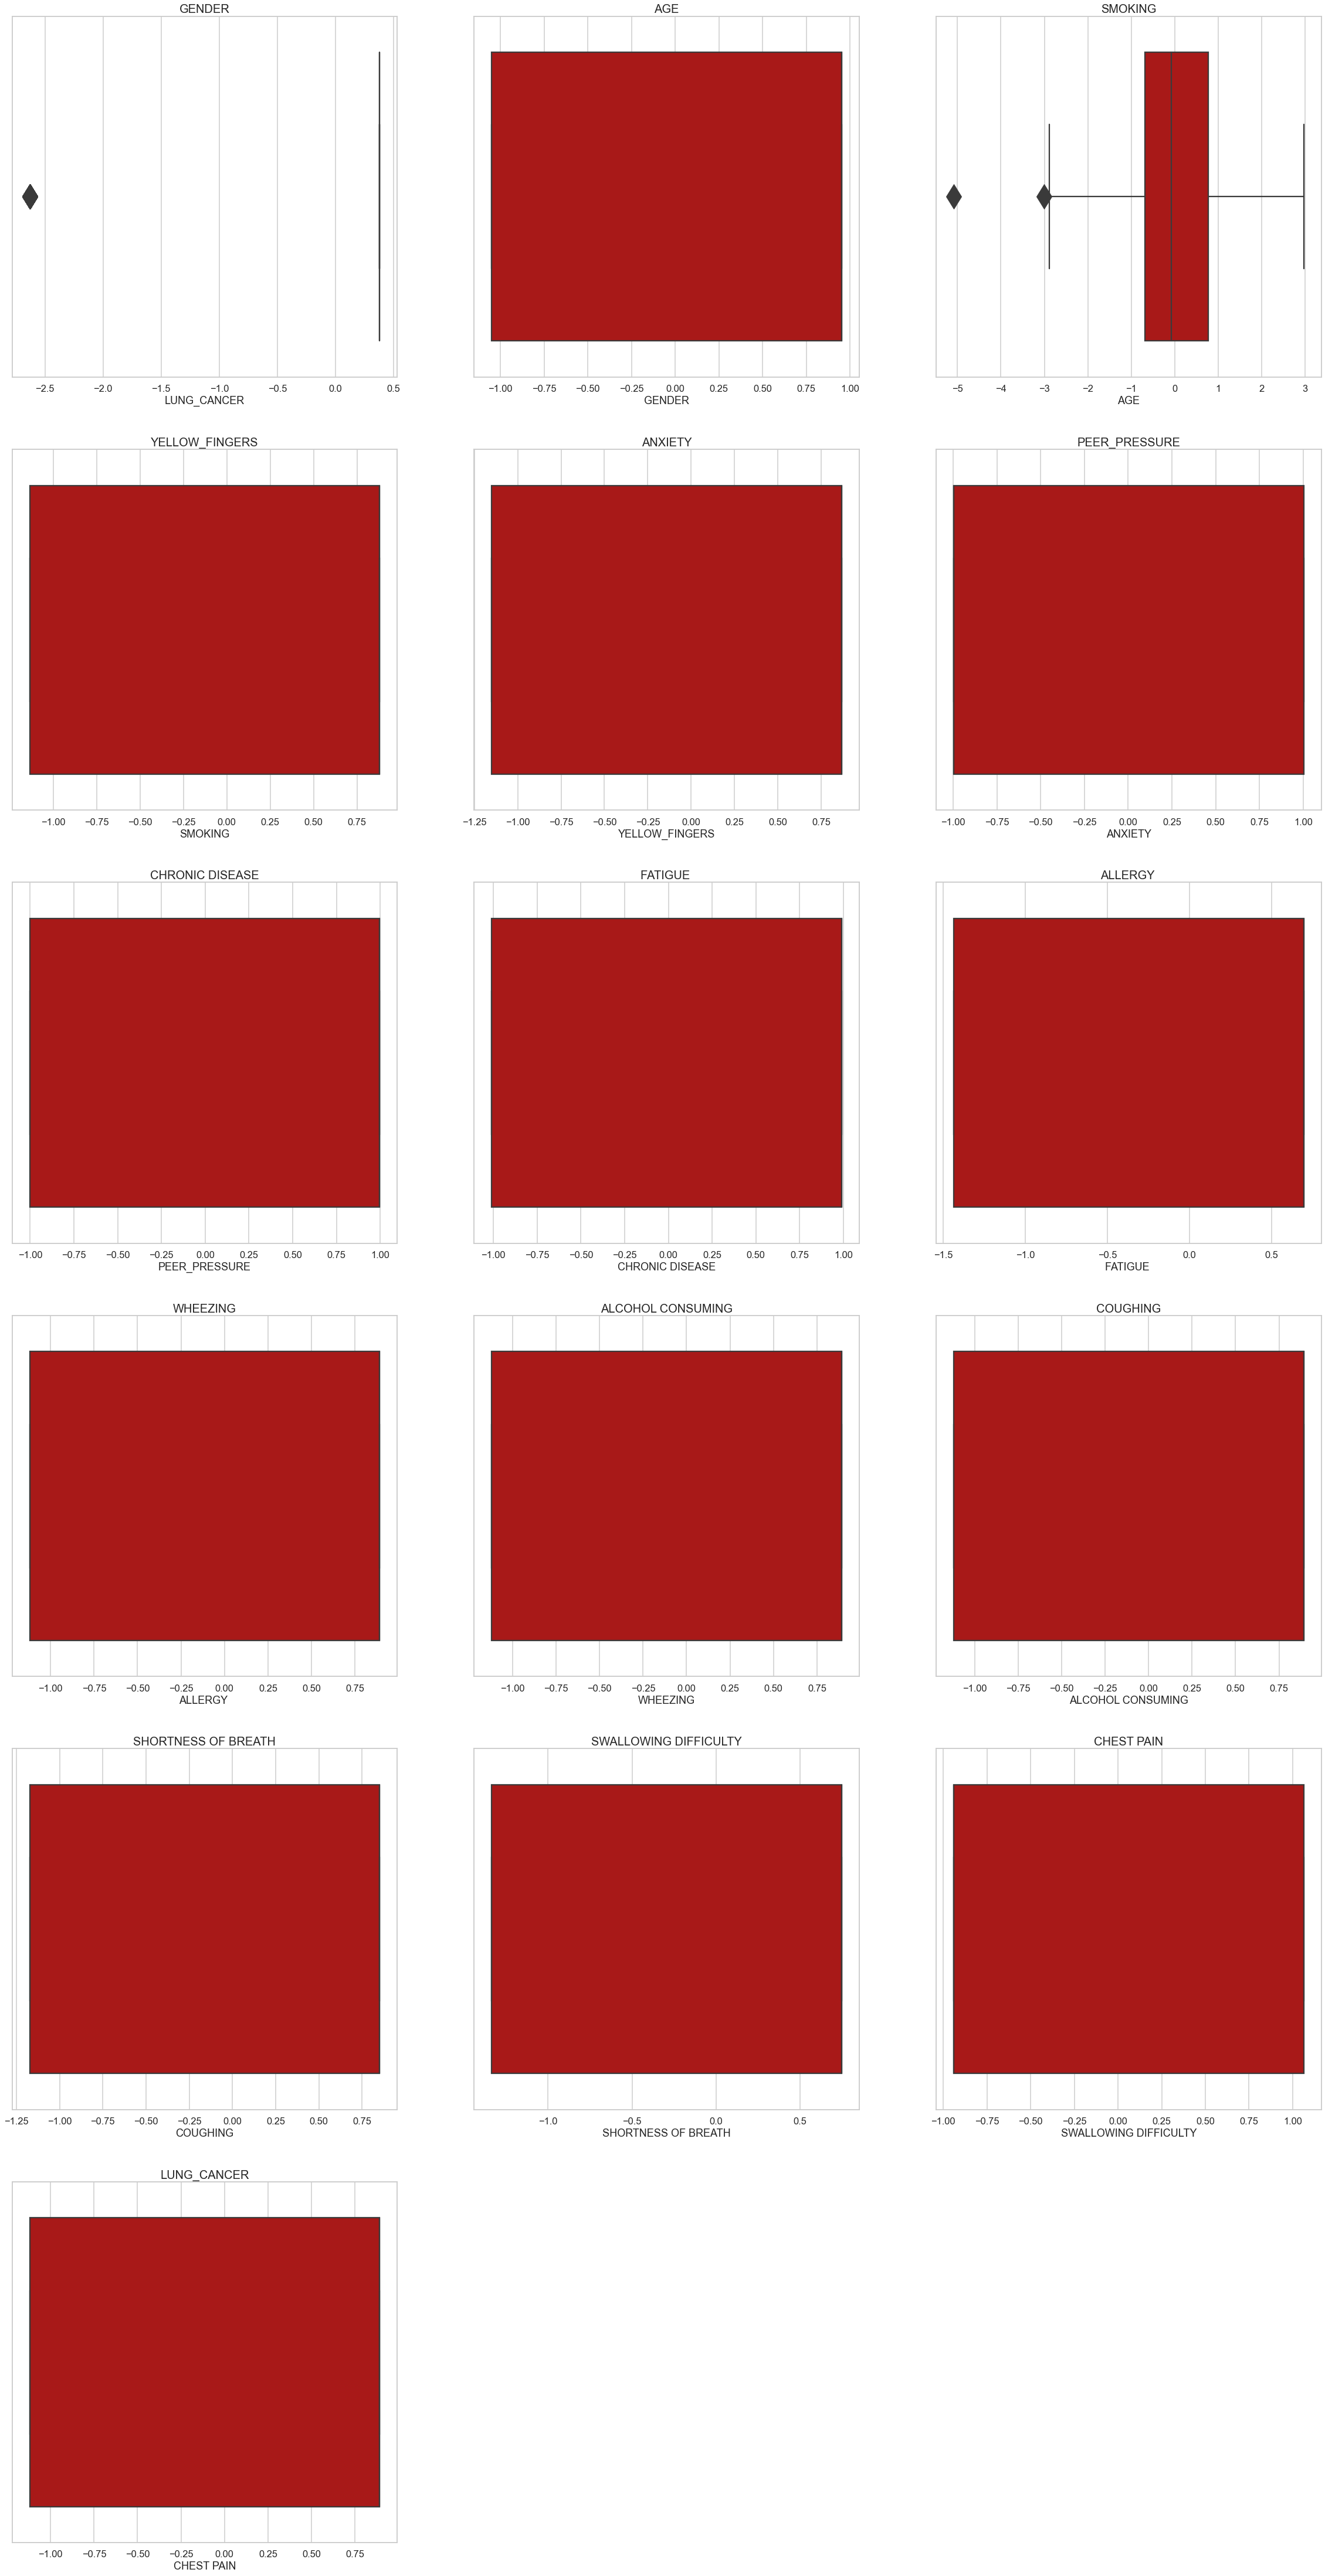

In [30]:
plt.figure(figsize = (40,120))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

for i in range(16):
    plt.subplot(9, 3, i+1)
    plt.title(copy_1.columns[i], fontsize = 20)
    sns.boxplot(x = scaled_data.columns[i-1], data = scaled_data, palette = 'gist_heat', 
                orient = 'h', fliersize = 30)

In [31]:
# Exclude the outliers

new_scaled_data = scaled_data

col = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 
       'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

for i in range(len(col)):
    lower = new_scaled_data[col[i]].quantile(0.05)
    upper = new_scaled_data[col[i]].quantile(0.95)
    IQR = upper - lower
    new_scaled_data = new_scaled_data[(new_scaled_data[col[i]] >= lower - 1.5 * IQR) &
                                      (new_scaled_data[col[i]] <= upper + 1.5 * IQR)]

### 2. K- Means Clustering

In [32]:
from sklearn.decomposition import IncrementalPCA

pca_analysis = IncrementalPCA(n_components = 8)
new_pca_scaled = pca_analysis.fit_transform(new_scaled_data)
new_pca_scaled.shape

(309, 8)

<AxesSubplot:title={'center':'Correlation coefficient of new scaled PCA'}>

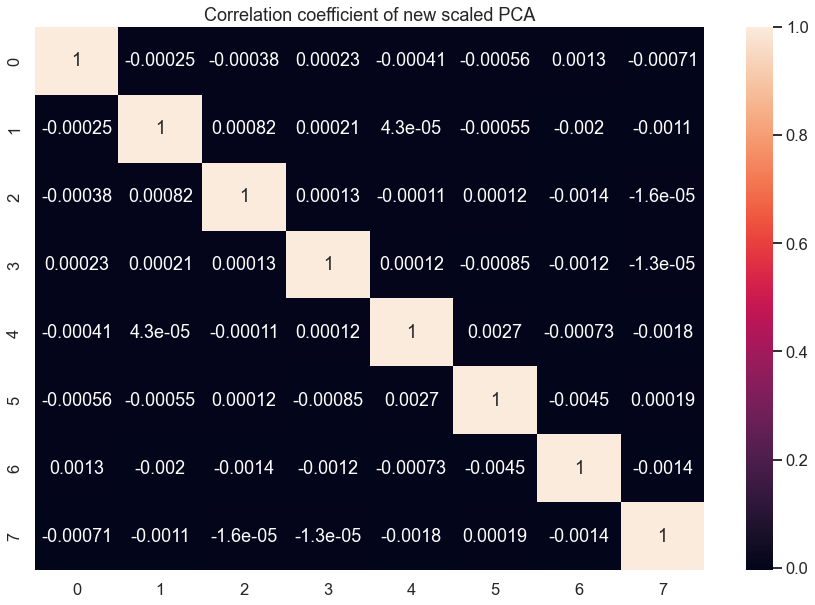

In [33]:
# correlation of new scaled PCA

pca_corr = np.corrcoef(new_pca_scaled.transpose())
plt.figure(figsize = (15,10))
plt.title('Correlation coefficient of new scaled PCA')
sns.heatmap(pca_corr, annot = True)

In [34]:
# Checking maximum & minimum correlation coefficient

corr_pca_min_max = pca_corr - np.diagflat(pca_corr.diagonal())
print('Max Correlation : ', corr_pca_min_max.max(), 
      '\nMin Correlation : ',corr_pca_min_max.min())


Max Correlation :  0.002693643601690267 
Min Correlation :  -0.004525149214079466


In [35]:
# Create new DataFrame for new pca scaled data

new_scaled_df = pd.DataFrame(new_pca_scaled)
new_scaled_df = new_scaled_df.rename(columns = {0 : 'PCA_1', 1 : 'PCA_2', 2 : 'PCA_3', 3 : 'PCA_4', 
                                                4 : 'PCA_5', 5 : 'PCA_6', 6 : 'PCA_7', 7 : 'PCA_8'})
new_scaled_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8
0,-0.700365,1.250661,1.004057,0.987539,-1.801997,-0.231442,-0.997181,1.709720
1,-0.703850,-0.357861,-0.289904,0.664941,1.743540,1.688787,1.001399,1.724731
2,-0.485335,-2.706978,0.910627,-0.347309,-1.144771,-2.002317,0.507989,0.985833
3,1.316495,0.038773,-3.499502,1.666540,-1.498382,-0.113595,-0.342022,0.948266
4,0.378108,-2.758401,0.070072,-0.853378,-2.502229,-0.387066,-1.882051,-0.253177


### Silhouette Analysis for K-Means clustering
#### Silhoutte analysis is used to study the separation distance between the resulting cluster. The plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and provides a way to assess parameters like number of clusters visually.

In [36]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

copy_1 = copy_1.reset_index()
new_data = copy_1.iloc[new_scaled_data.index]

cluster_range = [2,3,4,5,6,7,8,9]

for i in cluster_range:    
    kmeans_new = KMeans(n_clusters = i, max_iter = 200)
    kmeans_new.fit(new_scaled_data)
    cluster_labels = kmeans_new.labels_
    
    Silhouette_Score = silhouette_score(new_scaled_data, cluster_labels)
    print('Cluster : {}, Silhouette Score : {}'.format(i, Silhouette_Score))

Cluster : 2, Silhouette Score : 0.1304402345531723
Cluster : 3, Silhouette Score : 0.15545537631416986
Cluster : 4, Silhouette Score : 0.15972625154719292
Cluster : 5, Silhouette Score : 0.15479652775093586
Cluster : 6, Silhouette Score : 0.15392125756865907
Cluster : 7, Silhouette Score : 0.1512621857861712
Cluster : 8, Silhouette Score : 0.15662051675394295
Cluster : 9, Silhouette Score : 0.15101503240478825


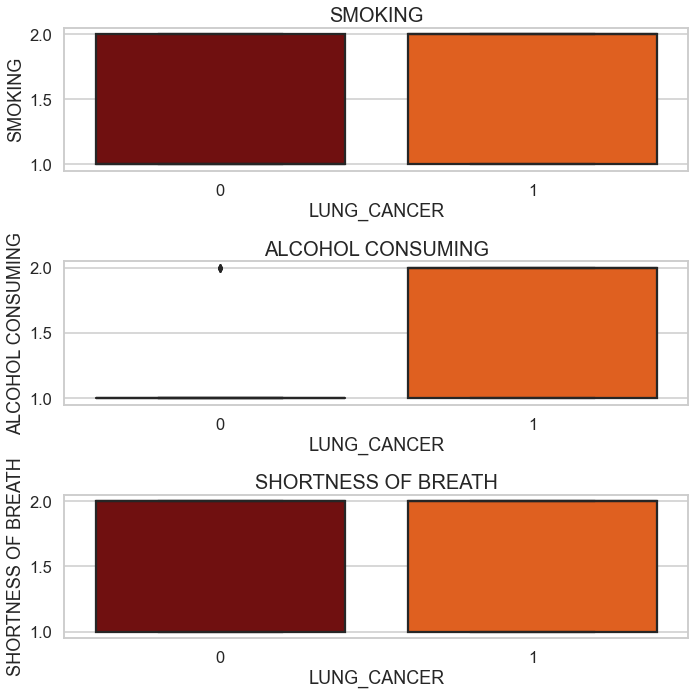

In [37]:
# Visualization of original variables using boxplot (smoking, alcohol consuming, shortness of breath)

plt.figure(figsize = (10,10))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

plt.subplot(3,1,1)
plt.title('SMOKING', fontsize = 20)
sns.boxplot(x = copy_1['LUNG_CANCER'], y = copy_1['SMOKING'], data = copy_1, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.subplot(3,1,2)
plt.title('ALCOHOL CONSUMING', fontsize = 20)
sns.boxplot(x = copy_1['LUNG_CANCER'], y = copy_1['ALCOHOL CONSUMING'], data = copy_1, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.subplot(3,1,3)
plt.title('SHORTNESS OF BREATH', fontsize = 20)
sns.boxplot(x = copy_1['LUNG_CANCER'], y = copy_1['SHORTNESS OF BREATH'], data = copy_1, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.tight_layout()
plt.show()

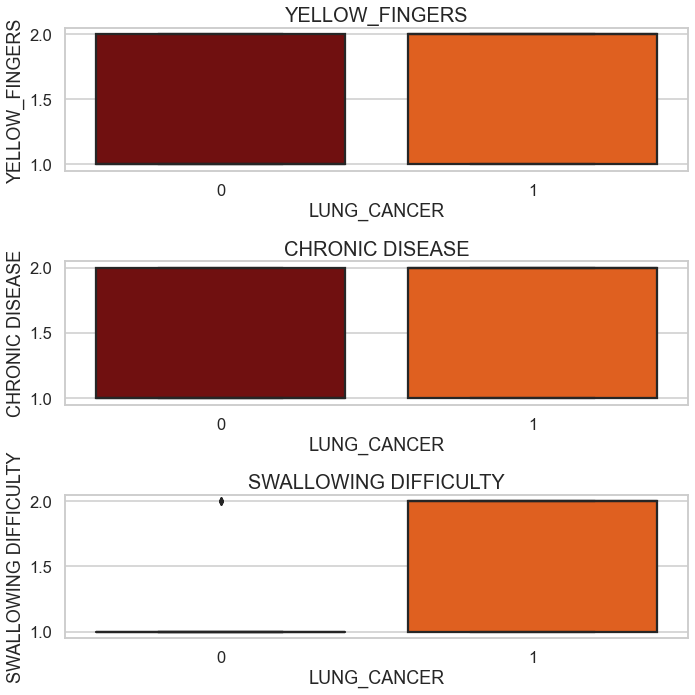

In [38]:
plt.figure(figsize = (10,10))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

plt.subplot(3,1,1)
plt.title('YELLOW_FINGERS', fontsize = 20)
sns.boxplot(x = copy_1['LUNG_CANCER'], y = copy_1['YELLOW_FINGERS'], data = copy_1, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.subplot(3,1,2)
plt.title('CHRONIC DISEASE', fontsize = 20)
sns.boxplot(x = copy_1['LUNG_CANCER'], y = copy_1['CHRONIC DISEASE'], data = copy_1, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.subplot(3,1,3)
plt.title('SWALLOWING DIFFICULTY', fontsize = 20)
sns.boxplot(x = copy_1['LUNG_CANCER'], y = copy_1['SWALLOWING DIFFICULTY'], data = copy_1, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.tight_layout()
plt.show()

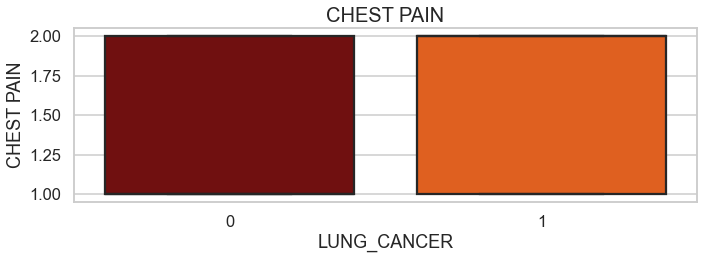

In [39]:
plt.figure(figsize = (10,10))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

plt.subplot(3,1,1)
plt.title('CHEST PAIN', fontsize = 20)
sns.boxplot(x = copy_1['LUNG_CANCER'], y = copy_1['CHEST PAIN'], data = copy_1, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.tight_layout()
plt.show()

### From the above sample boxplots, its clear that patients who has the habit of " smoking, shortness of breath, chest pain & alcohol consuming " has affected by lung cancer using K- MEANS CLUSTERING.

### 3. Hierarchical clustering

In [40]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [41]:
# copy of new scaled data to implement in Hierarchical clustering algorithm

h_cluster = new_scaled_data.copy()
h_clusters = h_cluster.columns
h_cluster.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.952579,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475,0.380058
1,0.952579,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475,0.380058
2,-1.049781,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475,-2.631174
3,0.952579,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475,-2.631174
4,-1.049781,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480,-2.631174


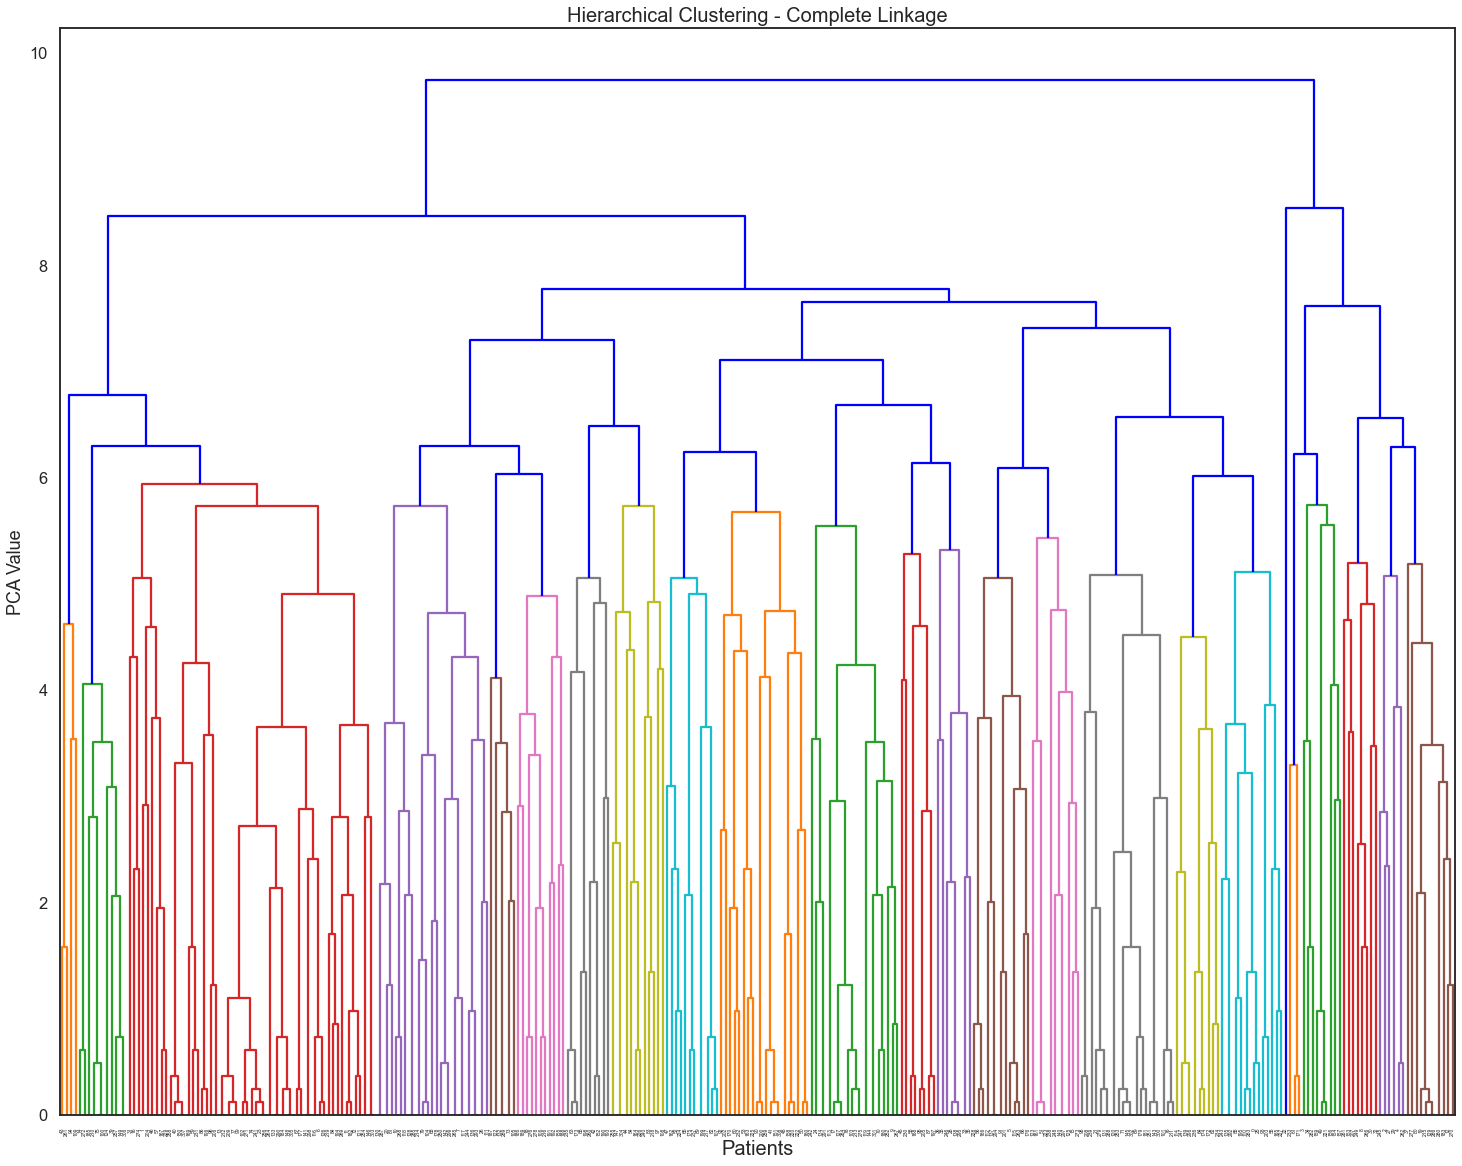

In [42]:
plt.figure(figsize = (25,20))
sns.set_style('white')

plt.title('Hierarchical Clustering - Complete Linkage', fontsize = 20)
plt.xlabel('Patients', fontsize = 20)
plt.ylabel('PCA Value')

complete_linkage = linkage(h_cluster, method = 'complete', metric = 'euclidean')
dendrogram(complete_linkage, above_threshold_color = 'blue', color_threshold = 6)

plt.show()

In [43]:
cluster_label1 = cut_tree(complete_linkage, n_clusters = 2).reshape(-1,)
print(cluster_label1)

print('\n')
h_cluster['LUNG_CANCER'] = cluster_label1
h_cluster.head(10)

[0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]




,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.952579,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475,0
1,0.952579,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475,0
2,-1.049781,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475,1
3,0.952579,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475,1
4,-1.049781,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480,1
5,-1.049781,1.503825,-1.135292,0.869300,-0.996769,-1.003241,0.990338,0.696833,0.892475,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480,0
6,0.952579,-1.302078,0.880830,-1.150351,-0.996769,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,-0.940291,0.892475,0
7,-1.049781,-1.424074,0.880830,0.869300,1.003241,0.996769,-1.009756,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,-1.120480,0
8,-1.049781,0.649855,0.880830,-1.150351,1.003241,-1.003241,-1.009756,0.696833,-1.120480,-1.120480,-1.120480,-1.173424,-1.335584,-0.940291,-1.120480,1
9,0.952579,-1.180082,0.880830,0.869300,1.003241,0.996769,0.990338,-1.435063,0.892475,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475,0


AttributeError: 'DataFrame' object has no attribute 'PCA_1'

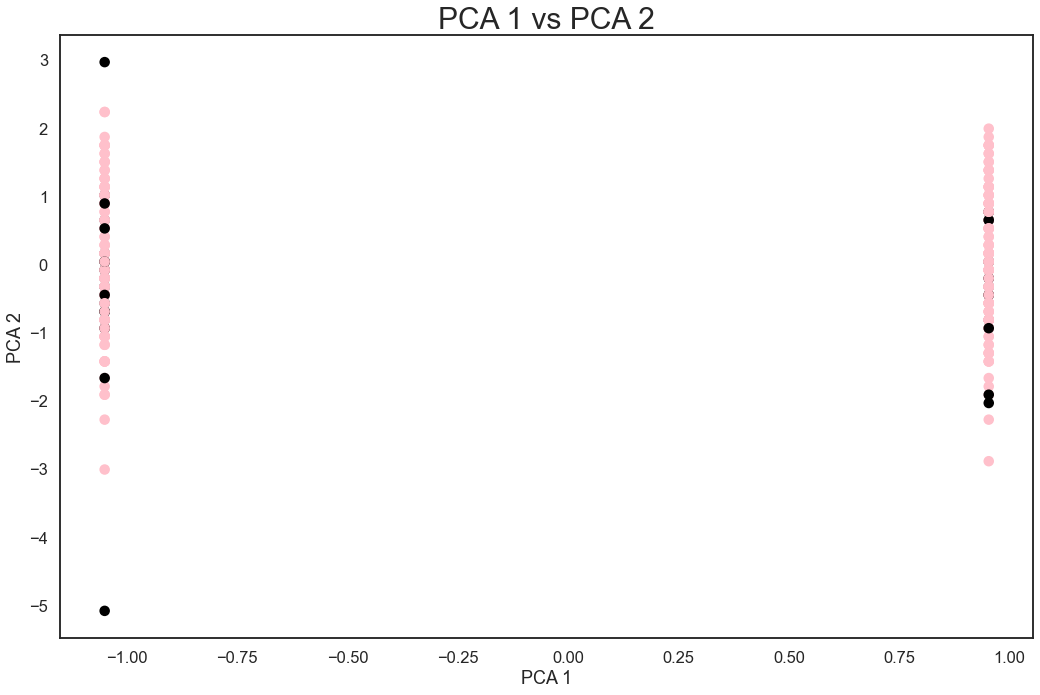

In [44]:
h_cluster_new = new_data.copy()

plt.figure(figsize = (15,10))
plt.title('PCA 1 vs PCA 2', fontsize = 30)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()

plt.scatter(h_cluster.iloc[:,0], h_cluster.iloc[:,1],
           c = h_cluster.LUNG_CANCER.map({ 0 : 'pink', 1 : 'black'}))

for i, txt in enumerate(h_cluster):
    plt.annotate(txt,(h_cluster_new.PCA_1[i], h_cluster_new.PCA_2[i]))
    
plt.show()

### From the given dataset, some patients considered as lung cancer patient but they are not - they belonged to "FALSE POSITIVE CATEGORY". (check PCA_1 = 1)
### Some patients are not affected by cancer but actually they are affected by lung cancer - they belonged to "FALSE NEGATIVE CATEGORY". (check PCA_1 = 0)

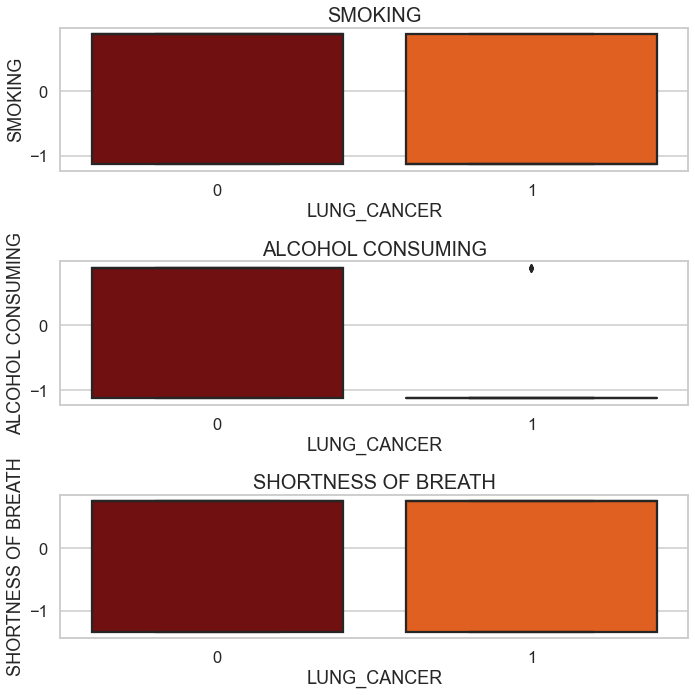

In [45]:
plt.figure(figsize = (10,10))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

plt.subplot(3,1,1)
plt.title('SMOKING', fontsize = 20)
sns.boxplot(x = h_cluster['LUNG_CANCER'], y = h_cluster['SMOKING'], data = h_cluster, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.subplot(3,1,2)
plt.title('ALCOHOL CONSUMING', fontsize = 20)
sns.boxplot(x = h_cluster['LUNG_CANCER'], y = h_cluster['ALCOHOL CONSUMING'], data = h_cluster, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.subplot(3,1,3)
plt.title('SHORTNESS OF BREATH', fontsize = 20)
sns.boxplot(x = h_cluster['LUNG_CANCER'], y = h_cluster['SHORTNESS OF BREATH'], data = h_cluster, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.tight_layout()
plt.show()

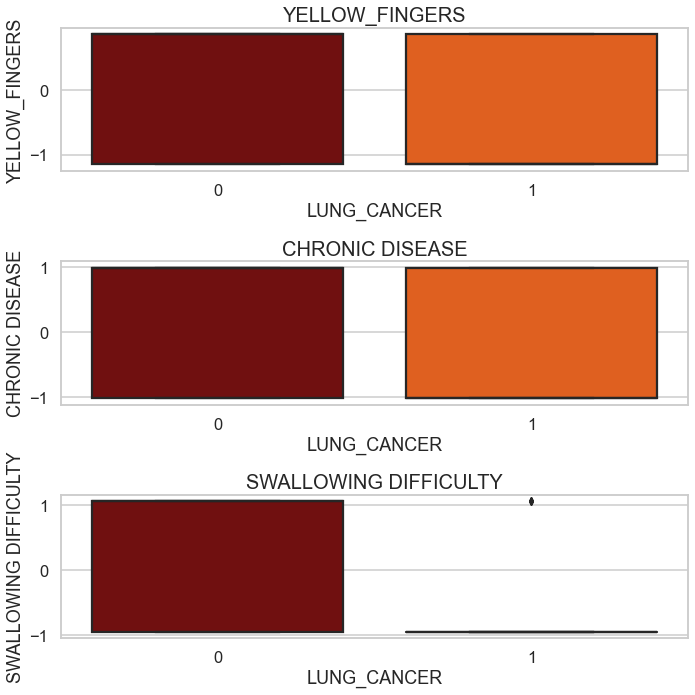

In [46]:
plt.figure(figsize = (10,10))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

plt.subplot(3,1,1)
plt.title('YELLOW_FINGERS', fontsize = 20)
sns.boxplot(x = h_cluster['LUNG_CANCER'], y = h_cluster['YELLOW_FINGERS'], data = h_cluster, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.subplot(3,1,2)
plt.title('CHRONIC DISEASE', fontsize = 20)
sns.boxplot(x = h_cluster['LUNG_CANCER'], y = h_cluster['CHRONIC DISEASE'], data = h_cluster, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.subplot(3,1,3)
plt.title('SWALLOWING DIFFICULTY', fontsize = 20)
sns.boxplot(x = h_cluster['LUNG_CANCER'], y = h_cluster['SWALLOWING DIFFICULTY'], data = h_cluster, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.tight_layout()
plt.show()

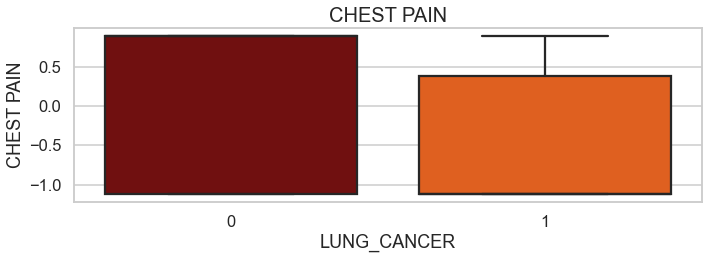

In [47]:
plt.figure(figsize = (10,10))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

plt.subplot(3,1,1)
plt.title('CHEST PAIN', fontsize = 20)
sns.boxplot(x = h_cluster['LUNG_CANCER'], y = h_cluster['CHEST PAIN'], data = h_cluster, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.tight_layout()
plt.show()

### From the above sample boxplots, its clear that patients who has the habit of " smoking, shortness of breath, chronic disease & yellow fingers " has affected by lung cancer using HIERARCHICAL CLUSTERING.

### Disease based on age distribution

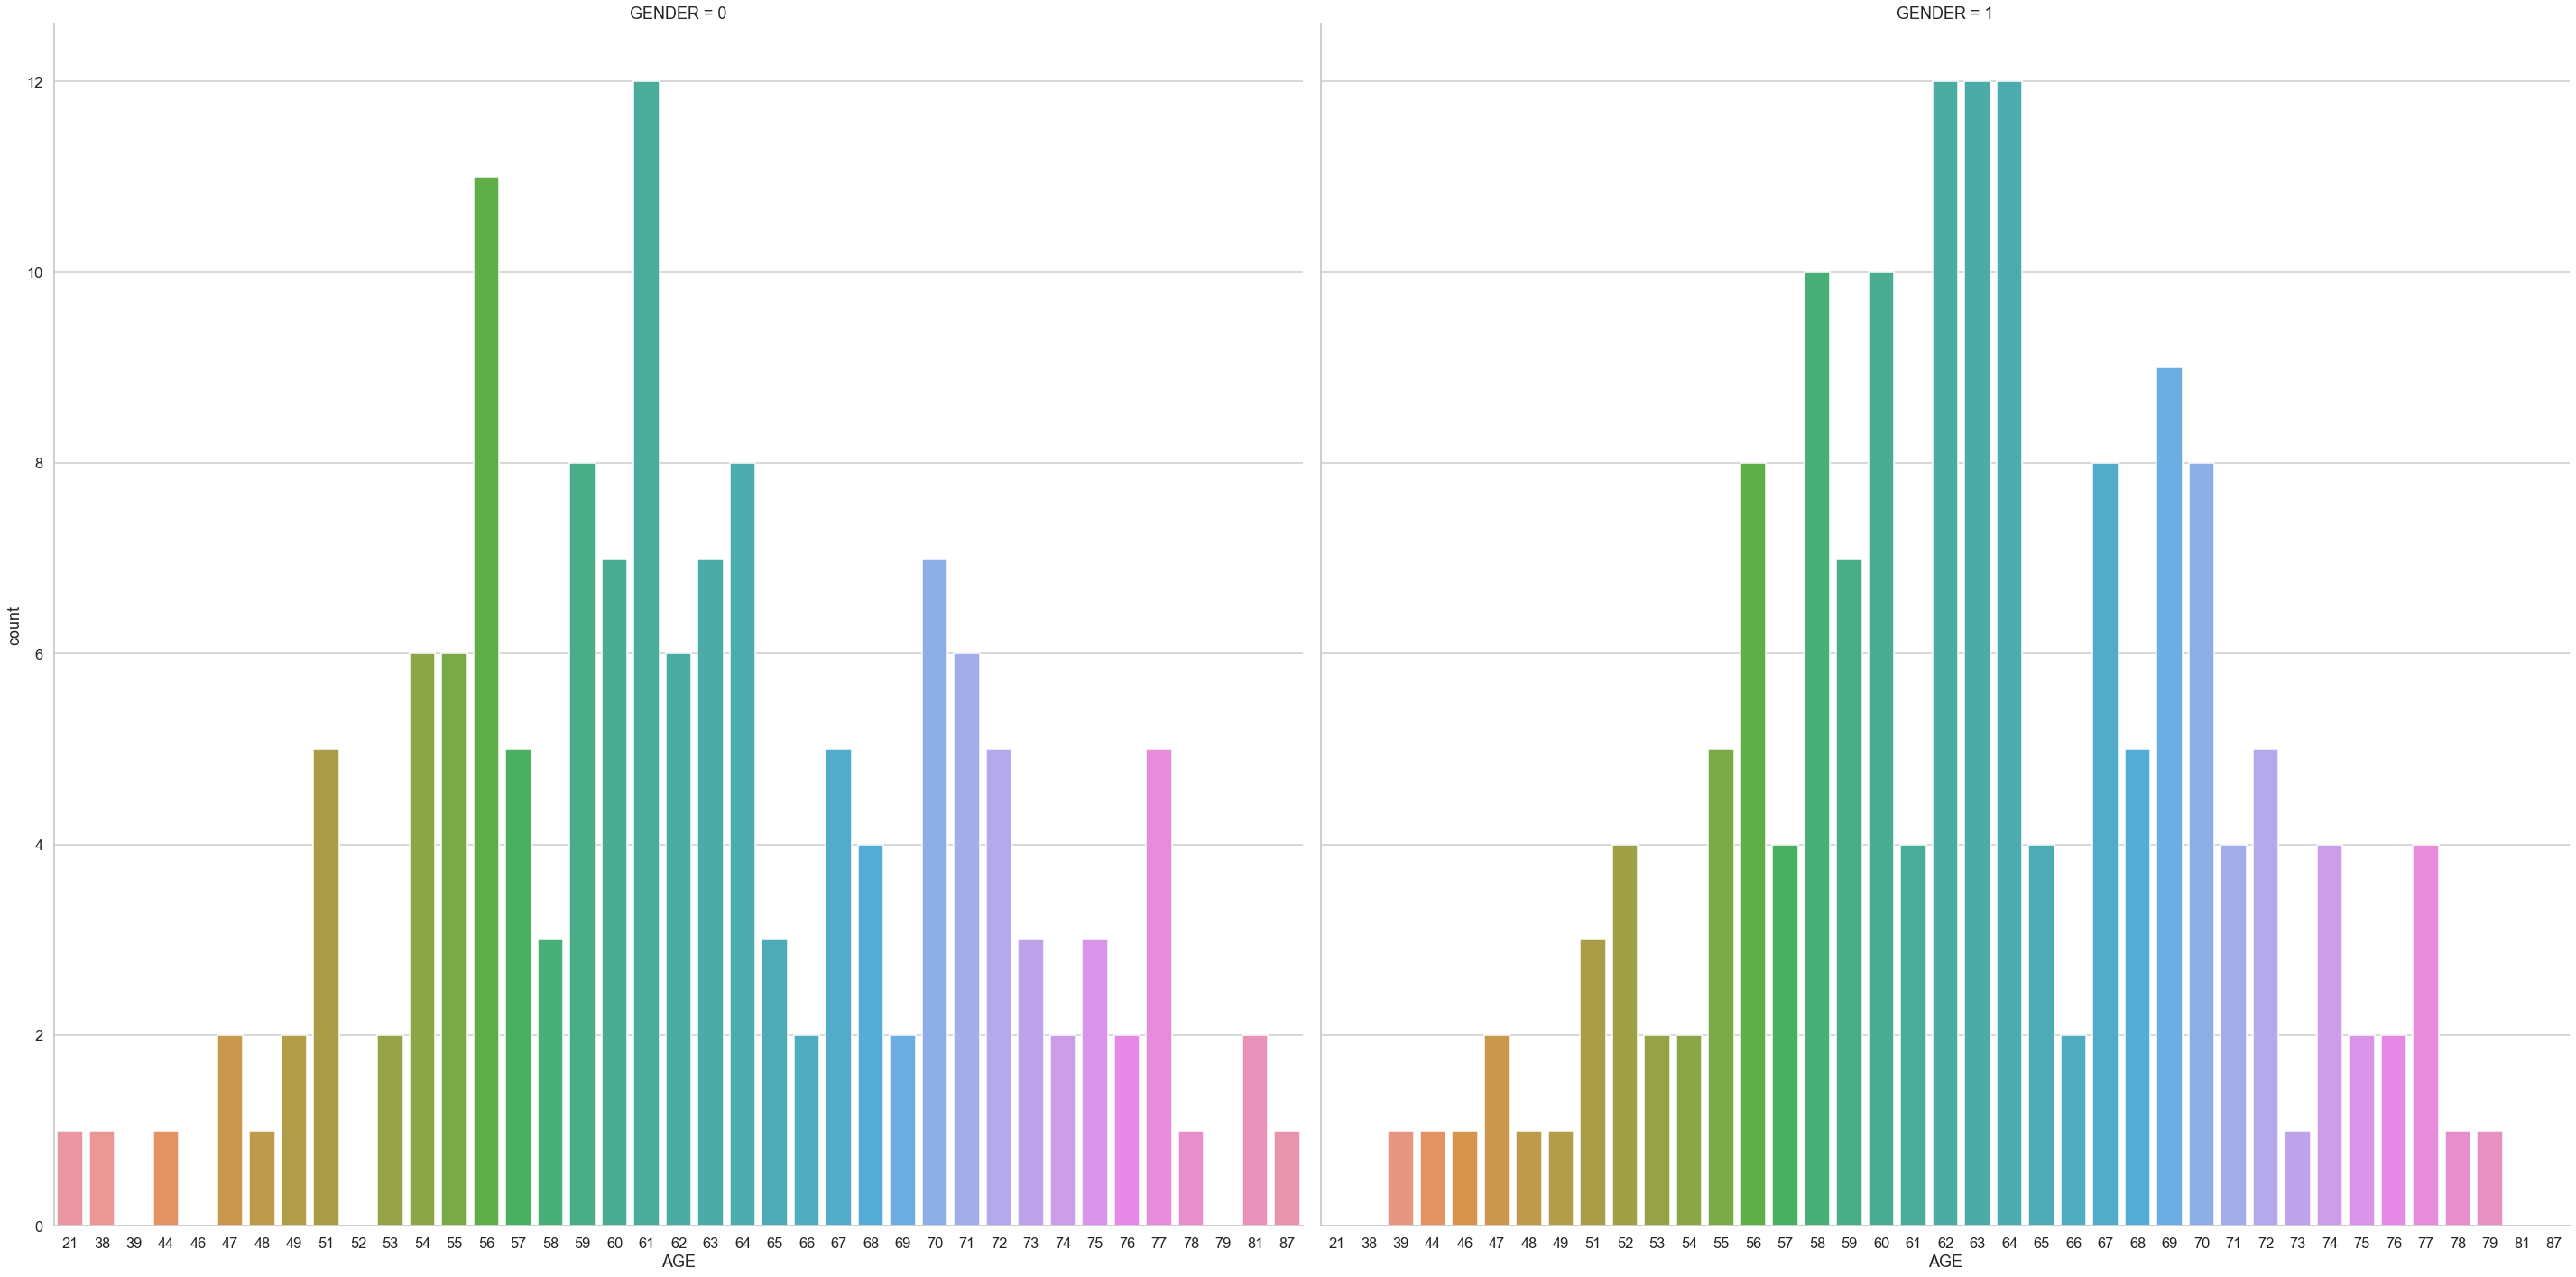

In [48]:
sns.factorplot(data = copy_2, x = 'AGE', col = 'GENDER', kind = 'count', size = 20)

#### Patients age between 51 to 72 has more counts affected by lung cancer. Mostly patients age between 60 to 65 reached highest count of cases.
#### Female : Age between 60 to 65 count is less, from 21 - 59 & 66 - 87 records less in count but average is recorded is high.
#### Male : Age between 55 - 72 records high cases as average of 7 & remaining age group records less number of cases.
#### Therefore Male has affected more than Female

## Accuracy score of various algorithms

In [49]:
x_data = copy_2.iloc[:,0:15].values
y_data = copy_2.iloc[:, -1].values

In [50]:
x = x_data.copy()
y = y_data.copy()

In [99]:
# Splitting data into test & train

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [100]:
x.shape

(309, 15)

In [101]:
y.shape

(309,)

In [102]:
# Fitting test & train using standardscaler

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


### 1. Supervised Learning Algorithms

In [103]:
def supervised_learning_model(x_train, y_train):
    
    # 1. Logistic Regression
    
    from sklearn.linear_model import LogisticRegression
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    #log_reg_p = log_reg.predict(x_test)
    
    # 2. Random Forest Classifier
    
    from sklearn.ensemble import RandomForestClassifier
    forest_c = RandomForestClassifier(n_estimators = 10)
    forest_c.fit(x_train, y_train)
    
    # 3. Decision Tree Classifier
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(x_train, y_train)
    
    # 4. Gaussian Naive Bayes
    
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    
    # 5. K-Nearest Neighbor
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 2)
    knn.fit(x_train, y_train)
    
    # 6. Support Vector Machine
    
    from sklearn.svm import SVC
    sv_classifier = SVC()
    sv_classifier.fit(x_train, y_train)
    
    # Printing accuracy
    
    print('1. Logistic Regression : ',log_reg.score(x_train, y_train))
    print('2. Random Forest Classifier : ',forest_c.score(x_train, y_train))
    print('3. Decision Tree Classifier : ',tree.score(x_train, y_train))
    print('4. Gaussian Naive Bayes : ',gnb.score(x_train, y_train))
    print('5. K-Nearest Neighbor : ',knn.score(x_train, y_train))
    print('6. Support Vector Machine : ',sv_classifier.score(x_train, y_train))
          
    return log_reg, forest_c, tree, gnb, knn, sv_classifier

In [104]:
print('**********  Accuracy Score of Supervised Learning Models  **********\n')
model = supervised_learning_model(x_train, y_train)

**********  Accuracy Score of Supervised Learning Models  **********

1. Logistic Regression :  0.9468599033816425
2. Random Forest Classifier :  0.9903381642512077
3. Decision Tree Classifier :  0.9951690821256038
4. Gaussian Naive Bayes :  0.927536231884058
5. K-Nearest Neighbor :  0.9371980676328503
6. Support Vector Machine :  0.9565217391304348


#### Accuracy of Decision tree classifier model - 99.5% & Random forest classifier - 99%
#### Therefore I consider these 2 models are best to predict the output

## Classification report & accuracy score

In [107]:
from sklearn.metrics import classification_report, accuracy_score

print('---------------  Classification Report  ---------------\n\n')

for i in range(len(model)):
    print('**********  Model ', i+1,'  **********')
    print(classification_report(y_test, model[i].predict(x_test)))
    print('Accuracy Score : ', accuracy_score(y_test, model[i].predict(x_test)),'\n\n')

---------------  Classification Report  ---------------


**********  Model  1   **********
              precision    recall  f1-score   support

           0       0.89      0.50      0.64        16
           1       0.91      0.99      0.95        86

    accuracy                           0.91       102
   macro avg       0.90      0.74      0.79       102
weighted avg       0.91      0.91      0.90       102

Accuracy Score :  0.9117647058823529 


**********  Model  2   **********
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        16
           1       0.92      0.95      0.94        86

    accuracy                           0.89       102
   macro avg       0.81      0.76      0.78       102
weighted avg       0.89      0.89      0.89       102

Accuracy Score :  0.8921568627450981 


**********  Model  3   **********
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        